In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, classification_report

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical

In [4]:
from keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

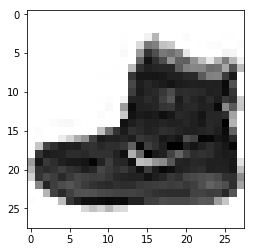

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [10]:
class_names[y_train[0]]

'Ankle boot'

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
from collections import Counter
Counter(y_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

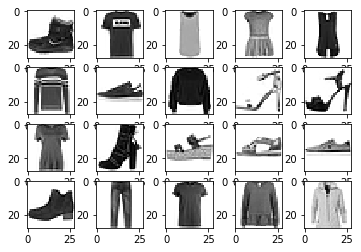

In [13]:
for i in range (20):
    fig= plt.subplot(4,5,i+1)
    fig.imshow(x_train[i], cmap=plt.cm.binary)
#     fig.title(class_names[y_train[i]])

In [14]:
x_train= x_train.reshape(60000, 28*28)

x_test= x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] )

In [15]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [16]:
y_train.shape

(60000, 10)

In [17]:
x_train.shape

(60000, 784)

In [26]:
model= Sequential()
model.add( Dense(units= 32, activation='relu', input_dim=784))
# model.add( Dense(units= 32, activation='relu'))
model.add( Dropout(0.4))
model.add( Dense(units= 16, activation='relu'))
model.add( Dense(units= 16, activation='relu'))
model.add( Dense(units= 8, activation='relu'))
# model.add( Dropout(0.4))
model.add( Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total para

In [27]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 83us/step - loss: 2.5906 - acc: 0.3339 - val_loss: 1.1906 - val_acc: 0.5651
Epoch 2/20
48000/48000 [==============================] - 3s 66us/step - loss: 1.3747 - acc: 0.4566 - val_loss: 1.0594 - val_acc: 0.5906
Epoch 3/20
48000/48000 [==============================] - 3s 65us/step - loss: 1.2046 - acc: 0.5171 - val_loss: 0.8279 - val_acc: 0.6984
Epoch 4/20
48000/48000 [==============================] - 3s 66us/step - loss: 1.0790 - acc: 0.5672 - val_loss: 0.7854 - val_acc: 0.7064
Epoch 5/20
48000/48000 [==============================] - 3s 65us/step - loss: 1.0465 - acc: 0.5782 - val_loss: 0.7644 - val_acc: 0.7078
Epoch 6/20
48000/48000 [==============================] - 3s 66us/step - loss: 1.0010 - acc: 0.5972 - val_loss: 0.7196 - val_acc: 0.7279
Epoch 7/20
48000/48000 [==============================] - 3s 66us/step - loss: 0.9557 - acc: 0.6201 - val_loss: 0.7423 - val_acc

In [29]:
y_pred= model.predict(x_test)

In [31]:
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.18, 0.  , 0.59],
       [0.05, 0.05, 0.32, ..., 0.  , 0.03, 0.  ],
       [0.  , 0.98, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.13, 0.  , 0.04, ..., 0.  , 0.47, 0.  ],
       [0.01, 0.91, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [33]:
y_pred_new= np.argmax(y_pred, axis=1)

In [34]:
y_pred_new.shape

(10000,)

In [35]:
y_test_new= np.argmax(y_test, axis=1)

In [36]:
accuracy_score(y_test_new, y_pred_new)

0.7306

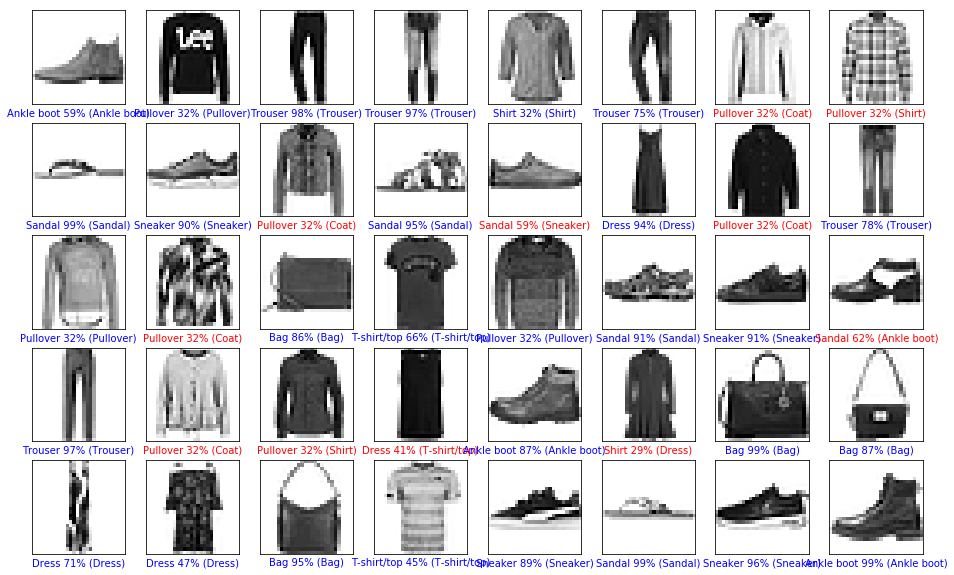

In [39]:
def plot_image(i, y_pred, y_test_class, img):
    y_pred, y_test_class, img = y_pred[i], y_test_class[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(y_pred)
    if predicted_label == y_test_class:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(y_pred),
                                class_names[y_test_class]),
                                color=color)

    
num_rows = 5
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_pred, y_test_new, x_test.reshape(10000, 28, 28))
plt.show()